<a href="https://www.kaggle.com/code/janadarwish/nti-lap-13?scriptVersionId=264118751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data=pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
params = {
    "n_estimators": [10, 15, 20],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],

}

grid=GridSearchCV(RandomForestClassifier(),params,cv=5)
grid.fit(x_train,y_train)


print('best params:',grid.best_params_)
print('best score:',grid.best_score_)

best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}
best score: 0.7850593096094896


In [7]:
model=RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_split=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=10)

In [8]:
model.score(x_test,y_test)

0.7272727272727273

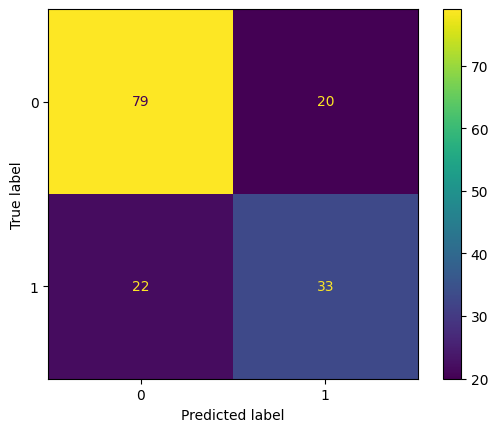

In [9]:
cm=confusion_matrix(y_test,model.predict(x_test))
plot=ConfusionMatrixDisplay(cm)
plot.plot()
plt.show()